In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
def select_network(network_num, chosen_data):

    data_ret = chosen_data[(chosen_data['PharmNetworkID'] == network_num)]

    groupcols = ['PharmNetworkName', 'SaleMonth']
    data_ret = data_ret.groupby(groupcols)[['Sale20']].sum()
    data_ret = data_ret.reset_index()

    phname = chosen_data[chosen_data['PharmNetworkID'] == network_num]
    phname_ret = phname.iloc[0]['PharmNetworkName']

    label_ret = 'Аптечная сеть: '

    return data_ret, phname_ret, label_ret

In [274]:
def build_graph(data123, label1, name1):
    fig, ax = plt.subplots(1, 1, figsize=(15,5))
    #data123['Sale20'].plot(label=name1)
    plt.plot(data123['SaleMonth'], data123['Sale20'], label=name1) 

    #plt.xlabel('dates', fontsize=14)
    ax = plt.gca()
    
    plt.xticks(np.arange(1, len(dates2)+1, 1.0))
    ax.set_xticklabels(dates2['SaleMonth'], fontsize=15, rotation=30)
    #ax.set_xticklabels(data123['SaleMonth'], fontsize=12, rotation=30)
    #plt.xticks(np.arange(1, len(dates)+1, 1.0))
    plt.tight_layout()

    plt.ylabel('Продажи', fontsize=20)
    plt.xlabel('Месяц', fontsize=20)
    plt.title(label1 + name1, fontsize=24)
    #plt.savefig(name1 +'.png', dpi=300, bbox_inches='tight')
    plt.legend()
    plt.show()

In [36]:
def select_region(region_num, dataregions):

    na_reg = dataregions[dataregions['RegionYandexNameL3ID'] == region_num]
    name_reg_ret = na_reg.iloc[0]['RegionYandexNameL3']

    label_reg_ret = 'Регион: '


    data_reg_ret = dataregions[(dataregions['RegionYandexNameL3ID'] == region_num)]

    groupcols2 = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth']
    data_reg_ret = data_reg_ret.groupby(groupcols2)[['Sale20']].sum()
    data_reg_ret = data_reg_ret.reset_index()
    
    return data_reg_ret, name_reg_ret, label_reg_ret

In [37]:
data = pd.read_excel('Sale_2018.xlsx', sheet_name='DrugstoreSale')
pharmnetworks = pd.read_excel('Dictionary.xlsx', sheet_name='Pharmnetworks')
drugstores = pd.read_excel('Drugstores.xlsx', sheet_name='DrugstoreListFN')

In [38]:
data_cor = data.merge(pharmnetworks, left_on='PharmNetworkID', right_on='PharmNetworkID', how='left')
#data2.head()

cols = data.columns.tolist()
#print(cols)
cols = cols[-1:] + cols[:-1]
#print(cols)

data_cor['Sale20'] = data['SaleQuantity']*data['ProductID']

columns_drugstores = ['DrugstoreFNID', 'RegionYandexNameL3', 'RegionYandexNameL3ID']
drugstores_region = drugstores[columns_drugstores]

data_cor = data_cor.merge(drugstores_region, left_on='DrugstoreFNID', right_on='DrugstoreFNID', how='left')
#target_columns = ['PharmNetworkID', 'PharmNetworkName', 'SaleYear', 'SaleMonth', 'ProductID', 'SaleQuantity']
#data2 = data2[target_columns]

data_cor = data_cor.fillna(0)
data_cor['RegionYandexNameL3ID'] = data_cor['RegionYandexNameL3ID'].astype(int)


dates = sorted(data['SaleMonth'].unique())
dates2 = pd.DataFrame({'SaleMonth':dates})
######################################################################


data2_columns = ['PharmNetworkID', 'PharmNetworkName', 'SaleMonth', 'ProductID', 'Sale20']
data2 = data_cor[data2_columns]

region_columns = ['RegionYandexNameL3ID', 'RegionYandexNameL3', 'SaleMonth', 'Sale20']
data_region = data_cor[region_columns]

# Построение графика продаж за 2018 год для выбранной Аптечной Сети #

In [266]:
pharmid = 1

######

data_select, name1, label1 = select_network(pharmid, data2)
data_select

,PharmNetworkName,SaleMonth,Sale20
0,Ригла,1,189063
1,Ригла,2,86378
2,Ригла,3,122871
3,Ригла,4,83771
4,Ригла,5,46631
5,Ригла,6,35303
6,Ригла,7,29725
7,Ригла,8,52508
8,Ригла,9,107606
9,Ригла,10,84903


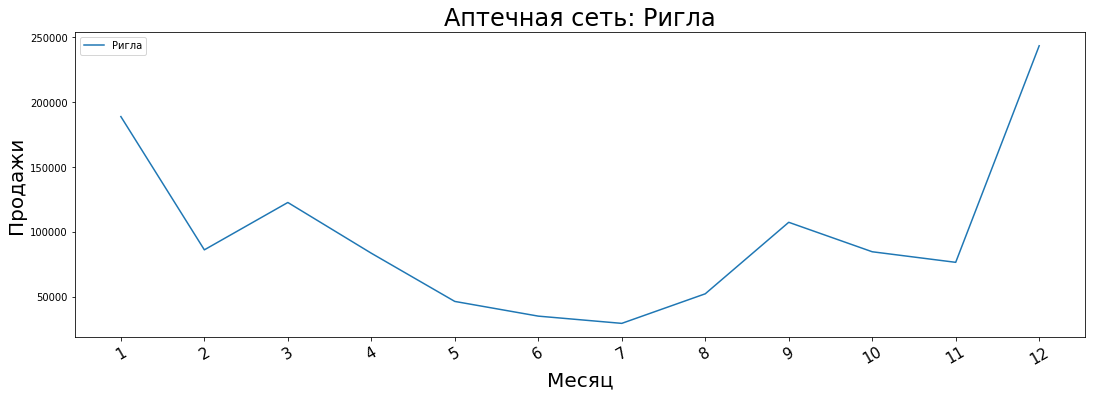

In [267]:
build_graph(data_select, label1, name1)

# Построение графика для 1-го региона #

In [268]:
number_region = 78

#########################

data_reg_in, name_reg_in, label_reg_in = select_region(number_region, data_region)
data_reg_in

,RegionYandexNameL3ID,RegionYandexNameL3,SaleMonth,Sale20
0,78,Санкт-Петербург,1,70696
1,78,Санкт-Петербург,2,96373
2,78,Санкт-Петербург,3,127685
3,78,Санкт-Петербург,4,60032
4,78,Санкт-Петербург,5,32894
5,78,Санкт-Петербург,6,30765
6,78,Санкт-Петербург,7,26112
7,78,Санкт-Петербург,8,36605
8,78,Санкт-Петербург,9,126553
9,78,Санкт-Петербург,10,83750


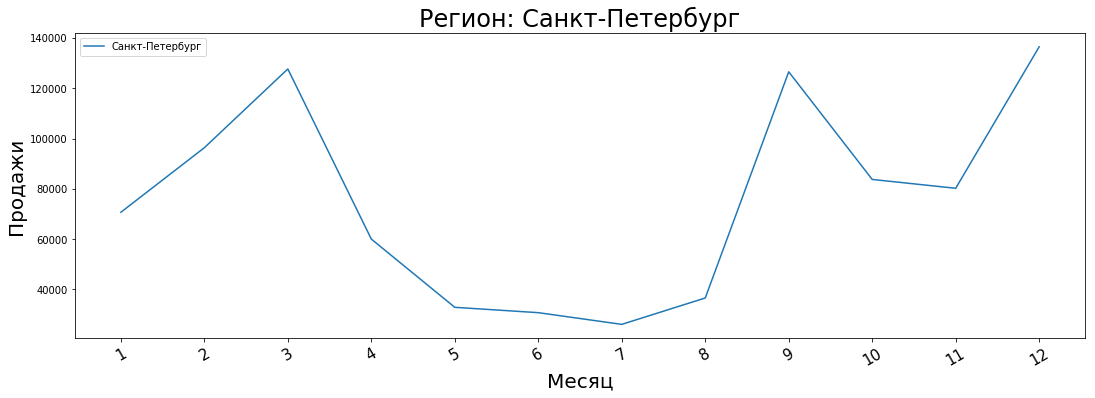

In [269]:
build_graph(data_reg_in, label_reg_in, name_reg_in)

# Построение графиков продаж для НЕСКОЛЬКИХ Аптечных Сетей #

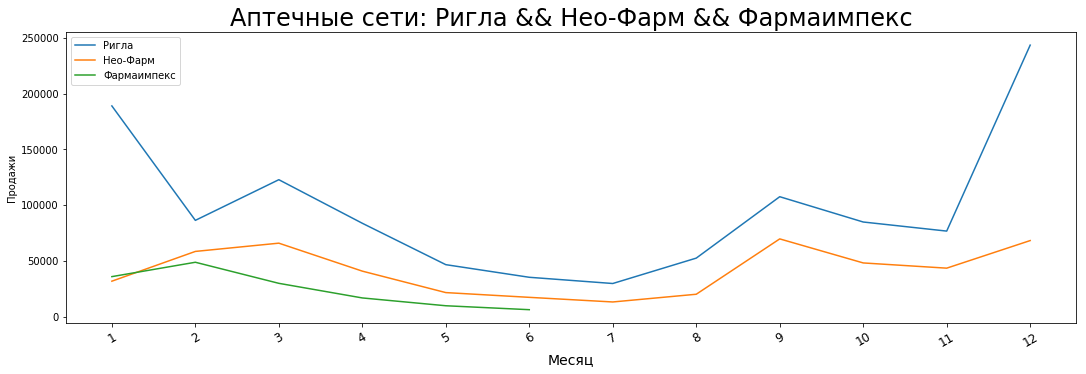

In [224]:
several_n = [1, 3, 4]

#####################
qnames = []
fig, ax = plt.subplots(1, 1, figsize=(15,5))
for i in several_n:
    qdata, qname, qlabel = select_network(i, data2)
    plt.plot(qdata['SaleMonth'], qdata['Sale20'], label=qname) 
    #qdata['Sale20'].plot(label=qname)
    qnames.append(qname)
    
re_label = 'Аптечные сети: '
re_label2 = 'Аптечные сети '

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(1, len(dates2)+1, 1.0))
ax.set_xticklabels(dates2['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname = ' && '.join(qnames)
    
plt.title(re_label + string_qname, fontsize=24)


# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(re_label2 + string_qname +'.png', dpi=300, bbox_inches='tight')


plt.legend()
plt.show()

# Построение графика для НЕСКОЛЬКИХ регионов #

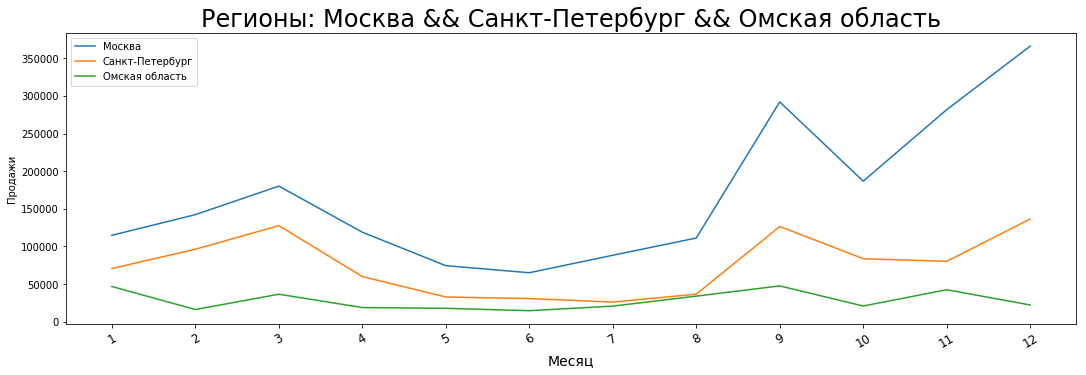

In [236]:
several_regions = [77, 78, 55]

#####################
qnames_r = []
fig, ax = plt.subplots(1, 1, figsize=(15,5))
for j in several_regions:
    qdata_r, qname_r, qlabel_r = select_region(j, data_region)
    #qdata_r['Sale20'].plot(label=qname_r)
    plt.plot(qdata_r['SaleMonth'], qdata_r['Sale20'], label=qname_r) 
    qnames_r.append(qname_r)
    
re_label_r = 'Регионы: '
re_label_r2 = 'Регионы '

plt.xlabel('dates', fontsize=14)
ax = plt.gca()
plt.xticks(np.arange(1, len(dates2)+1, 1.0))
ax.set_xticklabels(dates2['SaleMonth'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname_r = ' && '.join(qnames_r)
    
plt.title(re_label_r + string_qname_r, fontsize=24)

# СОХРАНЕНИЕ ГРАФИКА
#plt.savefig(re_label_r2 + string_qname_r +'.png', dpi=300, bbox_inches='tight')

plt.legend()
plt.show()

# Просмотр аптечных сетей #

In [45]:
network_cols = ['PharmNetworkName', 'PharmNetworkID', 'PharmNetworkType2']
pharmnetworks = pharmnetworks.sort_values(by=['PharmNetworkType', 'PharmNetworkName'])
network_id = pharmnetworks[network_cols]
network_id = network_id.drop_duplicates()
network_id = network_id.sort_values(by=['PharmNetworkID'])
network_id = network_id.reset_index()
network_id = network_id[network_cols]

pd.options.display.max_rows = 150

#pharmnetworks

In [46]:
regions_cols = ['RegionYandexNameL3', 'RegionYandexNameL3ID']
regions_id = data_region[regions_cols]
regions_id = regions_id.drop_duplicates()
regions_id = regions_id.sort_values(by=['RegionYandexNameL3ID'])
regions_id = regions_id.reset_index()
regions_id = regions_id[regions_cols]

#regions_id

In [79]:
data2017 = pd.read_excel('Sale_2017.xlsx', sheet_name='DrugstoreSale')
drugstores2017 = pd.read_excel('Sale_2017.xlsx', sheet_name='DrugstoreList')

In [80]:
drug2017cols = ['CityName', 'DrugstoreID']
drug2017_city = drugstores2017[drug2017cols]

data2017cols = ['PharmNetworkName', 'DrugstoreID', 'SaleMonth', 'SaleQuantity']
data2017_normal = data2017[data2017cols]

In [81]:
data2017mer = []

In [82]:
data2017mer = data2017_normal.merge(drug2017_city, left_on='DrugstoreID', right_on='DrugstoreID', how='left')

In [83]:
data2017mer.head()

,PharmNetworkName,DrugstoreID,SaleMonth,SaleQuantity,CityName
0,МЕГА ФАРМ,3,1,75.0,Балашиха
1,МЕГА ФАРМ,103,1,18.0,Коломна
2,МЕГА ФАРМ,8,1,18.0,Красногорск
3,МЕГА ФАРМ,131,1,19.0,Красногорск
4,МЕГА ФАРМ,132,1,39.0,Красногорск


In [84]:
data2017mer['Sale20'] = data2017mer['SaleQuantity']

In [113]:
data2017mer['PharmNetworkID'] = np.where(data2017mer['PharmNetworkName'] == 'МЕГА ФАРМ', 5, 0)

In [114]:
data2017mer['ProductID'] = 1

In [115]:
data2017mer.head()

,PharmNetworkName,DrugstoreID,SaleMonth,SaleQuantity,CityName,Sale20,PharmNetworkID,ProductID
0,МЕГА ФАРМ,3,1,75.0,Балашиха,75.0,5,1
1,МЕГА ФАРМ,103,1,18.0,Коломна,18.0,5,1
2,МЕГА ФАРМ,8,1,18.0,Красногорск,18.0,5,1
3,МЕГА ФАРМ,131,1,19.0,Красногорск,19.0,5,1
4,МЕГА ФАРМ,132,1,39.0,Красногорск,39.0,5,1


In [116]:
data2017mer2 = data2017mer[data2_columns]

In [117]:
data2017mer2.head()

,PharmNetworkID,PharmNetworkName,SaleMonth,ProductID,Sale20
0,5,МЕГА ФАРМ,1,1,75.0
1,5,МЕГА ФАРМ,1,1,18.0
2,5,МЕГА ФАРМ,1,1,18.0
3,5,МЕГА ФАРМ,1,1,19.0
4,5,МЕГА ФАРМ,1,1,39.0


In [118]:
data2017mer2['PharmNetworkID'] = data2017mer2['PharmNetworkID'].astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


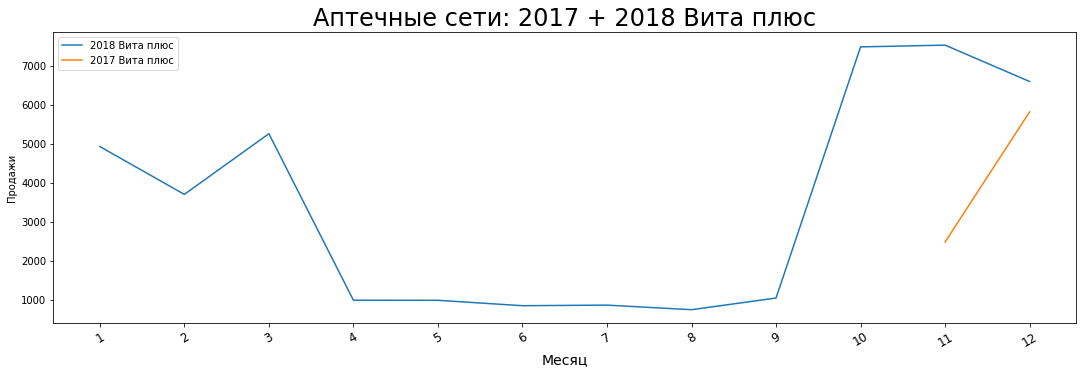

In [296]:
pharm_compare = 9

#####################
qnames = []
fig, ax = plt.subplots(1, 1, figsize=(15,5))


qdata, qname, qlabel = select_network(pharm_compare, data2)
plt.plot(qdata['SaleMonth'], qdata['Sale20'], label='2018 ' + qname) 
#qdata['Sale20'].plot(label='2018 ' + qname)
qnames.append('2018 ' + qname)



qdata3, qname3, qlabel3 = select_network(pharm_compare, data2017mer2)
#qdata3['Sale20'].plot(label='2017 ' + qname3)
plt.plot(qdata3['SaleMonth'], qdata3['Sale20'], label='2017 ' + qname) 
qnames.append('2017 ' + qname)
ax.set_xticklabels(qdata3['SaleMonth'], fontsize=12, rotation=30)


    
re_label = 'Аптечные сети: '
re_label2 = 'Аптечные сети '

plt.xlabel('dates', fontsize=14)
ax = plt.gca()

plt.xticks(np.arange(1, len(dates2)+1, 1.0))
ax.set_xticklabels(dates2['SaleMonth'], fontsize=12, rotation=30)

plt.tight_layout()

plt.ylabel('Продажи')
plt.xlabel('Месяц')

string_qname = ' && '.join(qnames)
    
plt.title(re_label + '2017 +'+ ' 2018 ' + qname, fontsize=24)


# СОХРАНЕНИЕ ГРАФИКА
plt.savefig(re_label2 + string_qname +'.png', dpi=300, bbox_inches='tight')


plt.legend()

plt.show()

In [123]:
#data2017mer2['PharmNetworkID'] = np.where(data2017mer2['PharmNetworkName'] == 'еАптека', 30, data2017mer2['PharmNetworkID'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
#data2017mer2['PharmNetworkID'] = np.where(data2017mer2['PharmNetworkName'] == 'Ригла (Будь Здоров)', 1, data2017mer2['PharmNetworkID'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
data2017mer2['PharmNetworkID'] = np.where(data2017mer2['PharmNetworkName'] == 'Имплозия', 94, data2017mer2['PharmNetworkID'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [234]:
data2017mer2['PharmNetworkID'] = np.where(data2017mer2['PharmNetworkName'] == 'ЭРКАФАРМ', 17, data2017mer2['PharmNetworkID'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [239]:
data2017mer2['PharmNetworkID'] = np.where(data2017mer2['PharmNetworkName'] == 'Апрель', 36, data2017mer2['PharmNetworkID'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [293]:
data2017mer2['PharmNetworkID'] = np.where(data2017mer2['PharmNetworkName'] == 'ИП Гончарова', 9, data2017mer2['PharmNetworkID'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [240]:
#writer = pd.ExcelWriter('2017_year_with_ID.xlsx', engine='xlsxwriter')
#data2017mer2.to_excel(writer, sheet_name='123', index=False)
#writer.save()

In [241]:
networks2017_without_id = data2017mer2[data2017mer2['PharmNetworkID'] == 0]

In [242]:
networks2017_without_id['PharmNetworkName'].unique()

array(['Мелодия здоровья', 'Нео-Фарм, Столички',
       'Планета здоровья, ОПЕКА', 'Фармаимпекс', 'Аптека Таймер',
       'ИРИС-ТД', 'ИРИС-ФК', 'ИРИС-ХМ', 'ФК', 'ТД', 'ХМ', 'ФК/ХМ',
       'ПроАптека', 'AVE +36.6', 'АСНА', 'Мобила (Вита)', 'Живика',
       'Самсон-Фарма', 'Аптека-сити', 'Гармония Плюс', 'МИС', 'ИП Коуров',
       'Сконто', 'ИП Калганова', 'ИП Зорина', 'ИП Бережная', 'Бонум',
       'Социальная аптека', 'Тиннер-Б', 'Сияние', 'Лекомед',
       'Губернские аптеки', 'ИП Гончарова', 'Фармация Мурманская',
       'Аптека Вашей семьи', 'Здоровье (Усть-Лабинск)', 'ИП Лещинская',
       'Аптека РОСФАРМСНАБ', 'Фармгарант', 'Рослек', 'Аптечный дом',
       'Гармония здоровья', 'ИП Чубова', 'Левзея', 'Эвалар', 'Диалог',
       'Сатурн (Экономъ)', 'Здоров.ру', 'Солнышко', 'А.Р.М.',
       'Здоровый город', 'ЕКАТЕРИНБУРГ - Фармарт', 'Аптечный Дом Рязань',
       'Алвик', 'Источник здоровья', 'Классика', 'Столет',
       'Новая больница', 'Пермфармация', 'Сердечко', 'ИП Страмилов',
 

In [275]:
%matplotlib inline

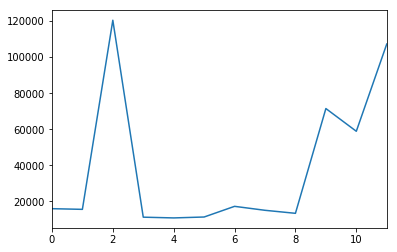

In [285]:
qdata['Sale20'].plot()

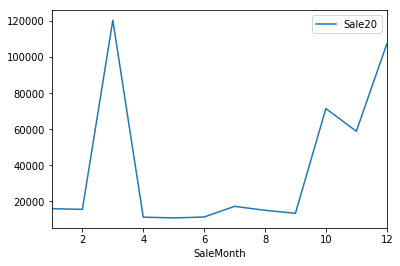

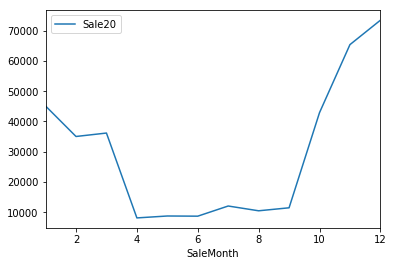

In [288]:
qdata.plot(x='SaleMonth', y='Sale20')
qdata3.plot(x='SaleMonth', y='Sale20')

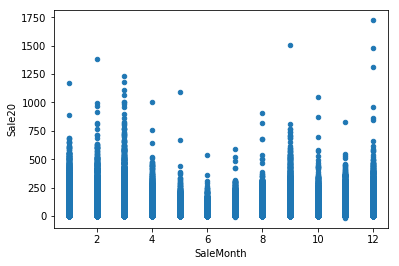

In [292]:
data2.plot.scatter(x='SaleMonth', y='Sale20')